# Titanic Data

VARIABLE DESCRIPTIONS

* survival: Survival (0 = No; 1 = Yes)|
* pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name: Name
* sex: Sex
* age: Age

VARIABLE DESCRIPTIONS

* sibsp: Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard
* ticket: Ticket Number
* fare: Passenger Fare
* cabin: Cabin
* embarked: Port of Embarkation 
    (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

Family Notes

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent:   Mother or Father of Passenger Aboard Titanic
* Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.



In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("http://bit.ly/tscv17")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, let's look at those survival rates, and see what's going on there?

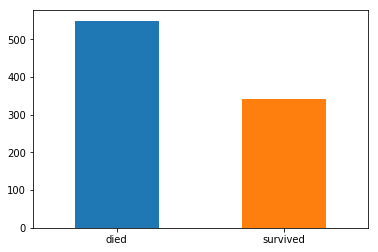

In [6]:
%matplotlib inline
fig, ax = plt.subplots()
_ = df['Survived'].value_counts().plot.bar(ax=ax)
_ = ax.set_xticklabels(["died", "survived"], rotation=0)

$\text{Probability of an Event} =  \frac{\text{Number of Favorable Outcomes}}{\text{Total Number of Possible Outcomes}}$

In [7]:
sp = (df['Survived']==1).sum()/df['Survived'].count()
print(f"Survival probabality is {sp}")

Survival probabality is 0.3838383838383838


# Lets see a break down by survival & gender

In [8]:
subset = df[["PassengerId","Survived", "Sex", "Age", "Pclass", "SibSp", "Parch"]]
subset.head()

,PassengerId,Survived,Sex,Age,Pclass,SibSp,Parch
0,1,0,male,22.0,3,1,0
1,2,1,female,38.0,1,1,0
2,3,1,female,26.0,3,0,0
3,4,1,female,35.0,1,1,0
4,5,0,male,35.0,3,0,0


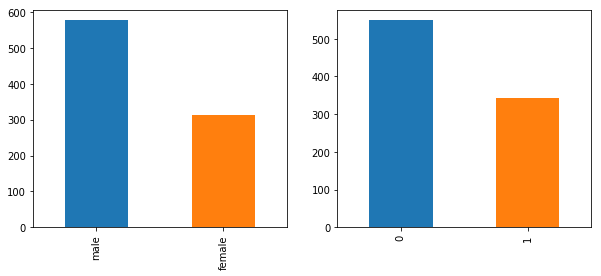

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
_ = subset["Sex"].value_counts().plot.bar(ax=ax1)
_ = subset["Survived"].value_counts().plot.bar(ax=ax2)

# How do we compute probability of surviving given gender?

In [16]:
gsub = subset[['Sex', 'Survived','PassengerId']].groupby(['Sex', "Survived"]).count()
gsub.unstack()

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

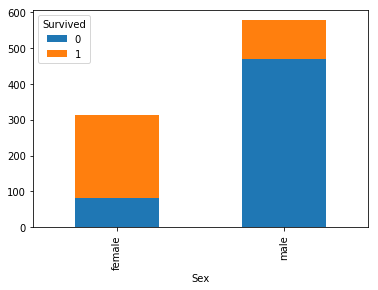

In [21]:
_ = gsub['PassengerId'].unstack().plot.bar(stacked='True')

# Given gender (A), what's the probability of surviving (B)?


In [36]:
# men survival rate:
men = gsub['PassengerId'].unstack().T['male']
men_df=(men/men.sum(axis=0))
men_df

Survived
0    0.811092
1    0.188908
Name: male, dtype: float64

In [141]:
women = gsub['PassengerId'].unstack().T['female']
women/women.sum(axis=0)

Survived
0    0.257962
1    0.742038
Name: female, dtype: float64

# Have a corpse, what's the probability of it being male? 
$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$

$ P(died|male) = \frac{P(male | died) * P(died)}{P(male)}$

In [37]:
p_male_died = men_df
p_died = 1 - subset['Survived'].sum()/subset['Survived'].count()
p_male = (subset['Sex'].str.contains('male')).sum()/subset['Sex'].count()
p_dead_male = (p_male_died * p_died)/ p_male

p_dead_male

Survived
0    0.499764
1    0.116398
Name: male, dtype: float64

In [38]:
(subset['Sex']=='male').count()

891

In [39]:
print("man died: ", p_male_died, "\nanybody died: ", p_died, "\npassanger was male: ", p_male)

man died:  Survived
0    0.811092
1    0.188908
Name: male, dtype: float64 
anybody died:  0.6161616161616161 
passanger was male:  1.0


# How does class factor in?

In [45]:
stab = subset.groupby(["Sex", "Pclass", "Survived",])['PassengerId'].count().unstack()
stab

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [69]:
stab.columns

Int64Index([0, 1], dtype='int64', name='Survived')

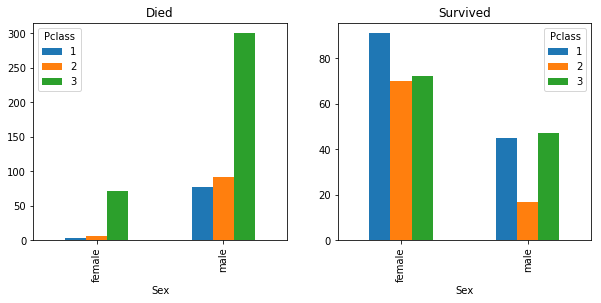

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
_ = stab[0].unstack().plot.bar(title="Died", ax=ax1)
_ = stab[1].unstack().plot.bar(title="Survived", ax=ax2)

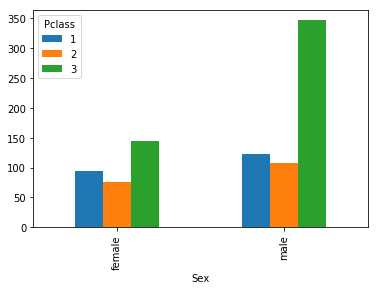

In [71]:
# Looks like maybe a class difference? and a gender difference? But what were the raw numbers?
total =  df.groupby([ "Sex", "Pclass"])["PassengerId"].count().unstack()
_ = total.plot.bar()

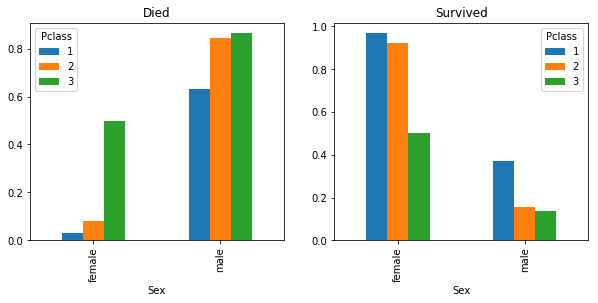

In [72]:
# rates?
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
_ = (stab[0].unstack()/total).plot.bar(title="Died", ax=ax1)
_ = (stab[1].unstack()/total).plot.bar(title="Survived", ax=ax2)